In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')
def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)

# Hands-on Activity 16.2: Logistic regression with many features

## Objectives

+ To demonstrate logistic regression with many features

## High melting explosives sensitivity
Let's repeat what we did for the HMX example.
Instead of using a linear model inside the sigmoid, we will use a quadratic model.
That is, the probability of an explosion will be:
$$
p(y=1|x,\mathbf{w}) = \operatorname{sigm}\left(w_0 + w_1 x + w_2 x^2\right).
$$
Let's load the data firs:

In [3]:
# Load the data using pandas
import pandas as pd
data = pd.read_csv('hmx_data.csv')

In [4]:
data

,Height,Result
0,40.5,E
1,40.5,E
2,40.5,E
3,40.5,E
4,40.5,E
5,40.5,E
6,40.5,E
7,40.5,E
8,40.5,E
9,40.5,E


In [11]:
# Extract data for regression
# Heights as a numpy array
x = data['Height'].values
# The labels must be 0 and 1
# We will use a dictionary to indicate our labeling
label_coding = {'E': 1, 'N': 0}
y = np.array([label_coding[r] for r in data['Result']])
data['y'] = y
data

,Height,Result,y
0,40.5,E,1
1,40.5,E,1
2,40.5,E,1
3,40.5,E,1
4,40.5,E,1
5,40.5,E,1
6,40.5,E,1
7,40.5,E,1
8,40.5,E,1
9,40.5,E,1


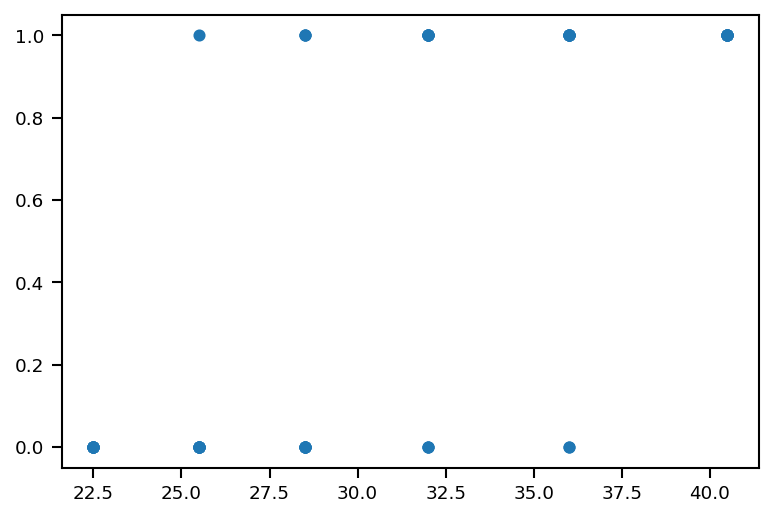

In [10]:
fig, ax = plt.subplots(dpi=150)
ax.plot(x, y, 'o')

In [12]:
# Separate data into training and validation
num_obs = x.shape[0]
# Select what percentage you want to put in the training data
train_percentage = 0.7
# Figure out how many training points you are going to use:
num_train = int(num_obs * train_percentage)
# Figure out how many validation points you are going to use:
num_valid = num_obs - num_train
print('num_train = {0:d}, num_valid = {1:d}'.format(num_train, num_valid))

num_train = 42, num_valid = 18


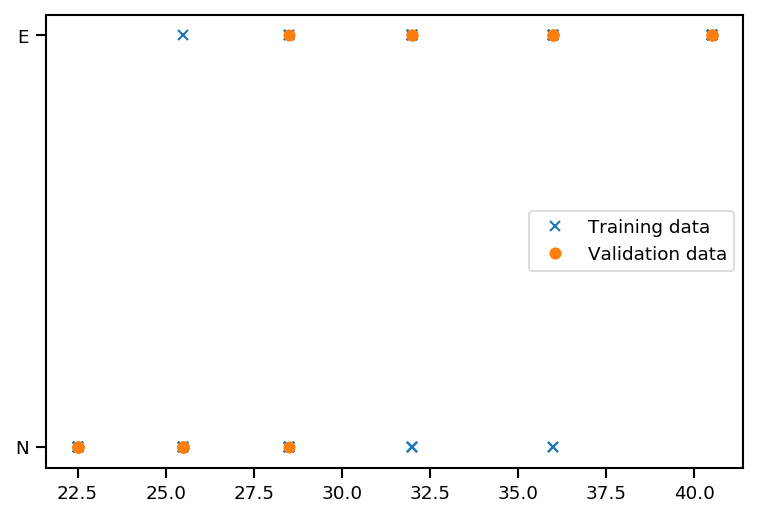

In [13]:
# Before splitting the data, randomly permute rows
permuted_data = np.random.permutation(data)
# Split
train_data = permuted_data[:num_train] # This picks the first n_train rows
valid_data = permuted_data[num_train:] # This puts the rest on the validation rows
# Get the x's and the y's for regression
x_train = train_data[:, 0]
y_train = train_data[:, 1]
x_valid = valid_data[:, 0]
y_valid = valid_data[:, 1]
# Let's plot the training and the validation datasets in different colors
fig, ax = plt.subplots(dpi=150)
ax.plot(x_train, y_train, 'x', label='Training data')
ax.plot(x_valid, y_valid, 'o', label='Validation data')
plt.legend(loc='best');

In [15]:
from sklearn.linear_model import LogisticRegression

In [21]:
# Make the design matrix
X_train = np.hstack([np.ones((x_train.shape[0], 1)), x_train[:, None]])
X_valid = np.hstack([np.ones((x_valid.shape[0], 1)), x_valid[:, None]])

In [23]:
model = LogisticRegression(penalty='none').fit(X_train, y_train)

In [24]:
model.coef_

array([[ 5.45875463, -0.34747786]])

In [25]:
model.predict(X_valid)

array(['E', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'E', 'N', 'E', 'E',
       'N', 'N', 'N', 'N', 'E'], dtype=object)

In [27]:
predictions = model.predict_proba(X_valid)

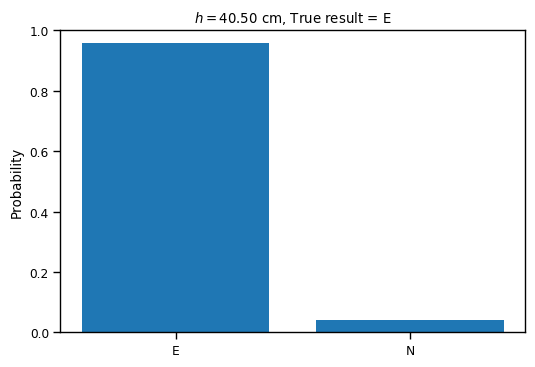

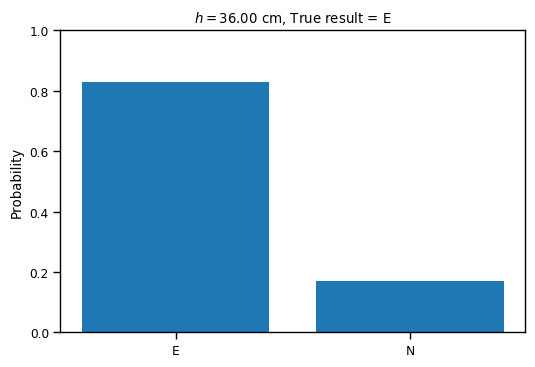

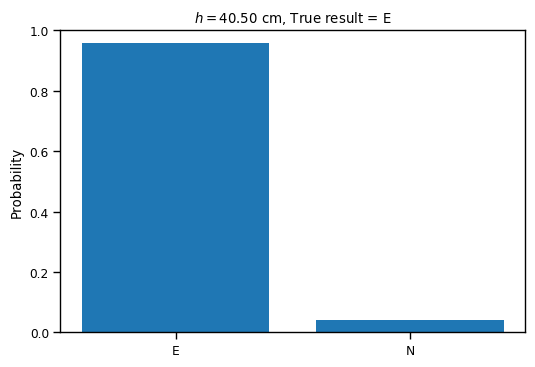

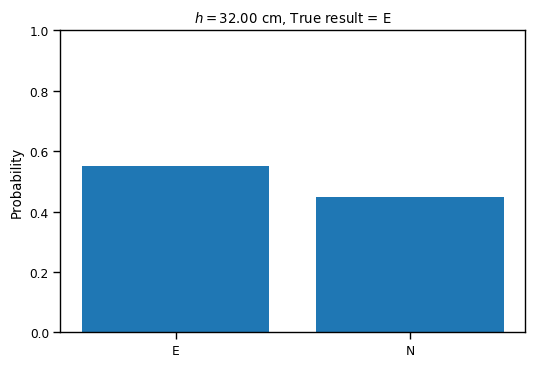

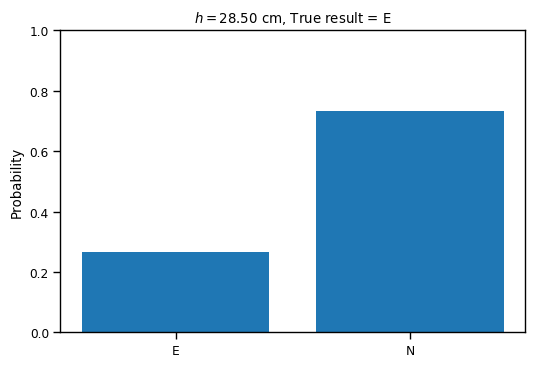

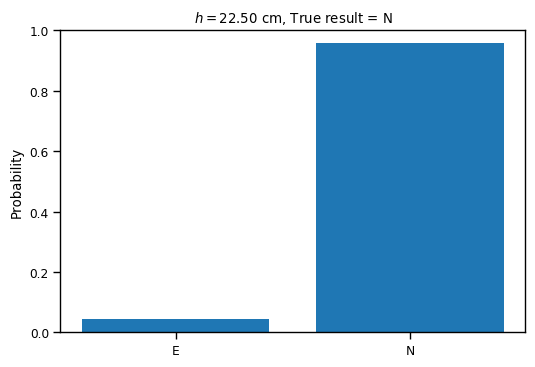

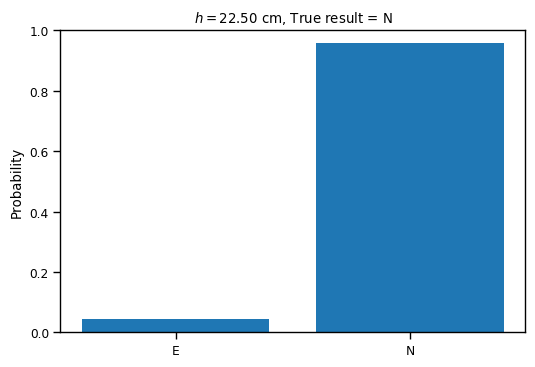

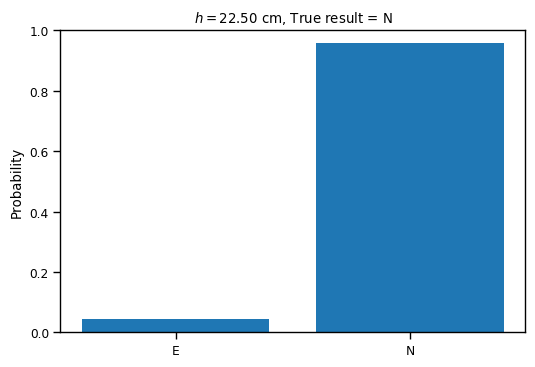

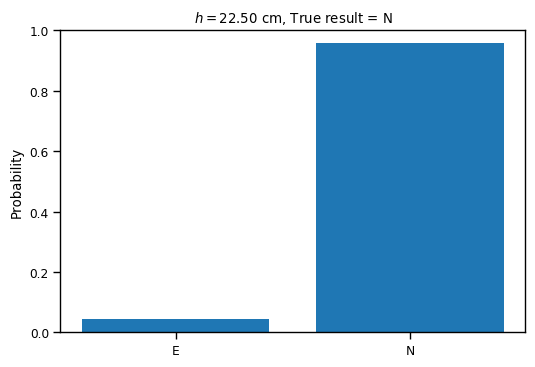

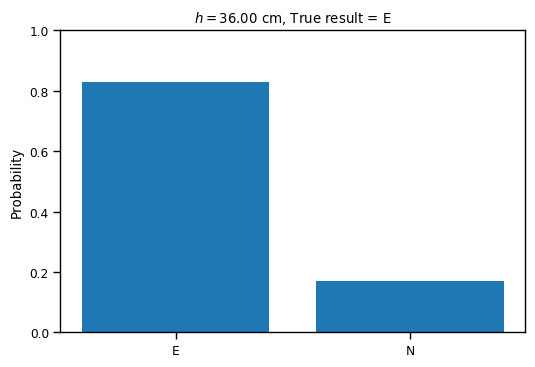

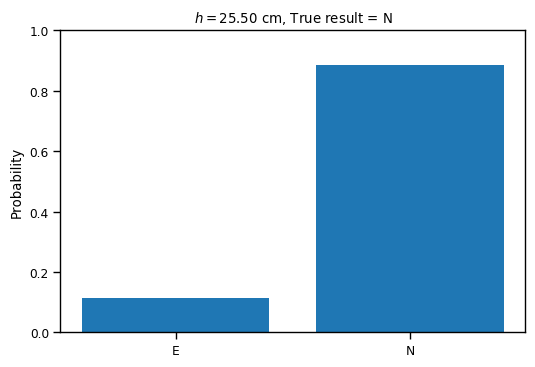

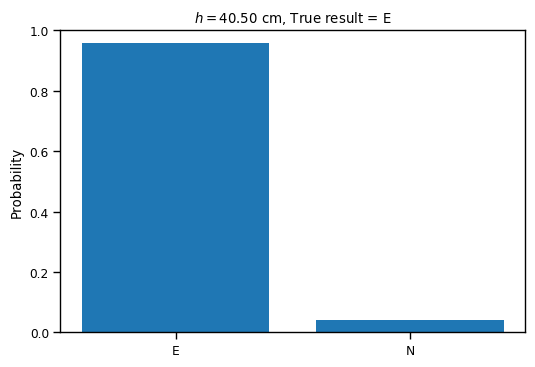

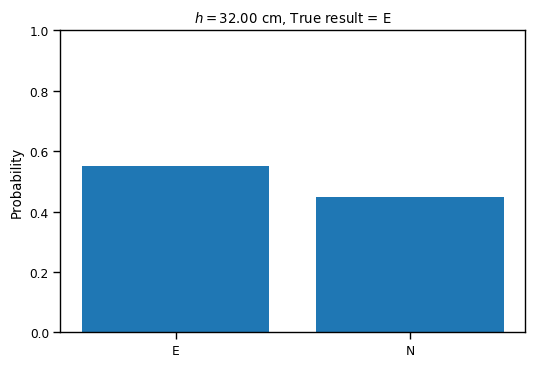

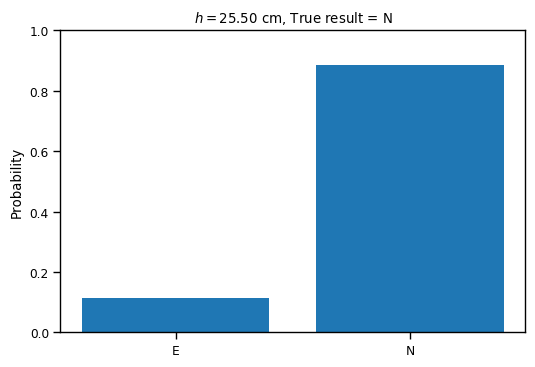

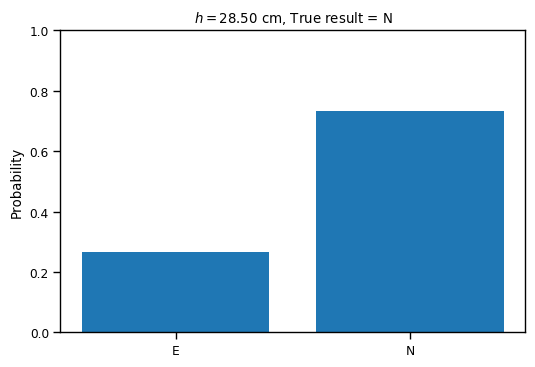

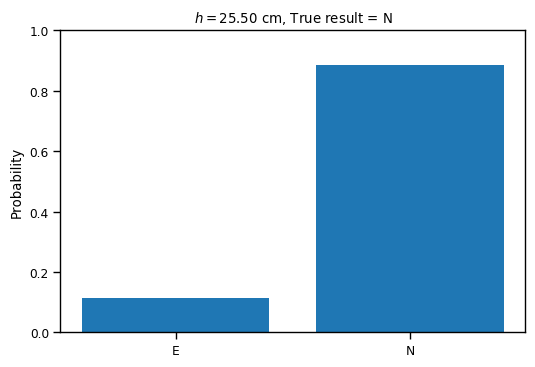

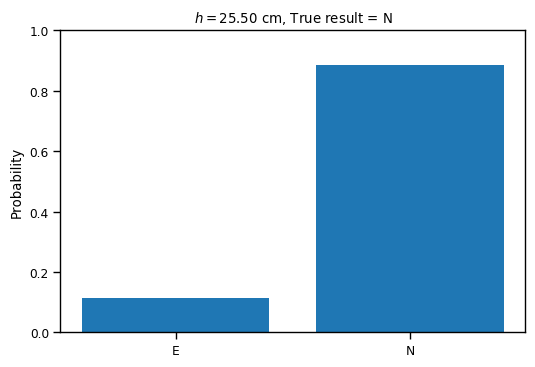

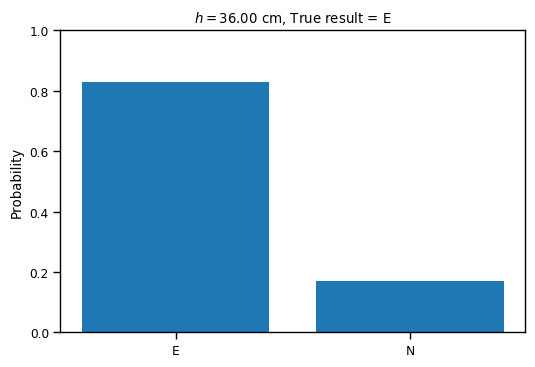

In [50]:
for i in range(X_valid.shape[0]):
    fig, ax = plt.subplots(dpi=100)
    ax.bar(np.arange(2), predictions[i])
    ax.set_title(r'$h={0:1.2f}$ cm, True result = {1:s}'.format(x_valid[i], y_valid[i]))
    ax.set_ylim([0, 1.0])
    ax.set_xticks([0, 1])
    ax.set_xticklabels(model.classes_)
    ax.set_ylabel('Probability')

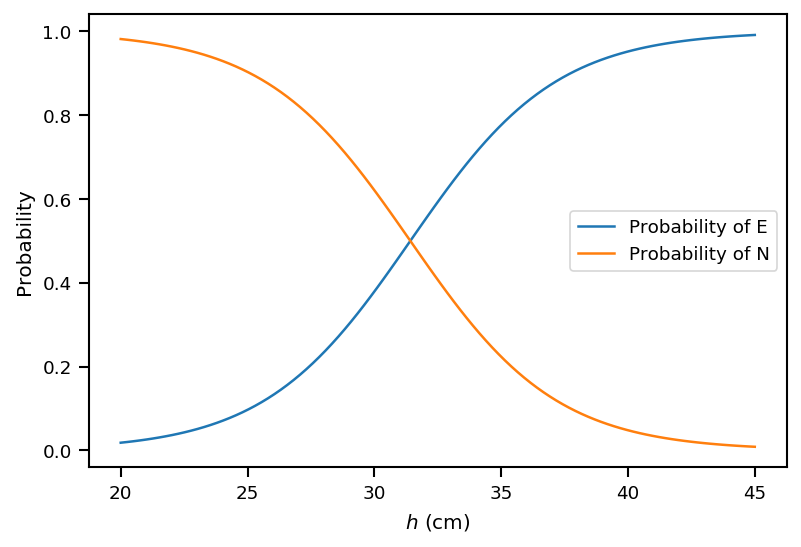

In [55]:
fig, ax = plt.subplots(dpi=150)
xx = np.linspace(20.0, 45.0, 100)
XX = np.hstack([np.ones((xx.shape[0], 1)), xx[:, None]])
predictions_xx = model.predict_proba(XX)
ax.plot(xx, predictions_xx[:, 0], label='Probability of E')
ax.plot(xx, predictions_xx[:, 1], label='Probability of N')
ax.set_xlabel('$h$ (cm)')
ax.set_ylabel('Probability')
plt.legend(loc='best')

In [73]:
# c_00 = cost of correctly predicting E when E is true
# c_01 = cost of wrongly predicting N when E is true
# c_10 = cost of wrongly predicting E when N is true
cost_matrix = np.array(
[[0.0, 1.0],
 [1.0, 0.0]]
)

In [86]:
def expected_cost(cost_matrix, prediction_prob):
    res = np.zeros((2,))
    for i in range(2):
        res[i] = cost_matrix[i, 0] * prediction_prob[0] + cost_matrix[i, 1] * prediction_prob[1]
    return res

In [87]:
expected_cost(cost_matrix, predictions[0])

array([0.04088122, 0.95911878])

In [88]:
exp_cost = np.einsum('ij,ki->kj', cost_matrix, predictions)
np.argmin(exp_cost, axis=1)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0])

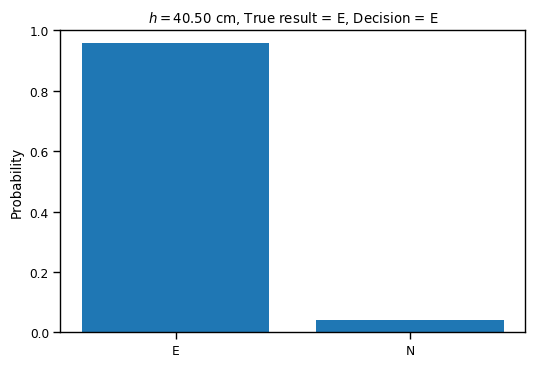

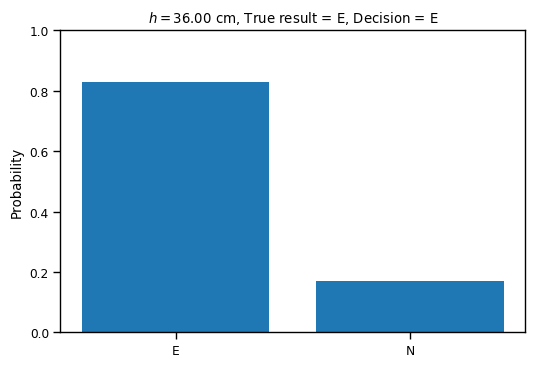

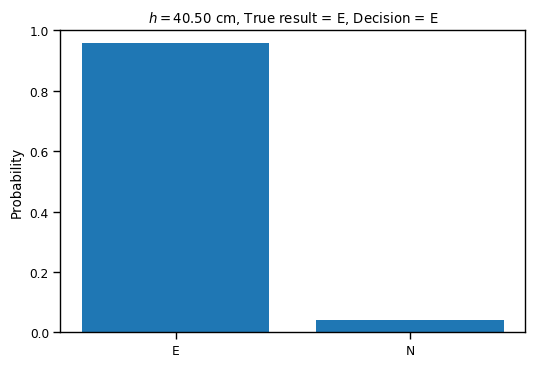

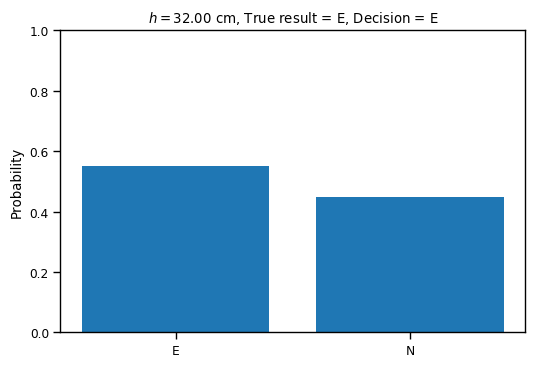

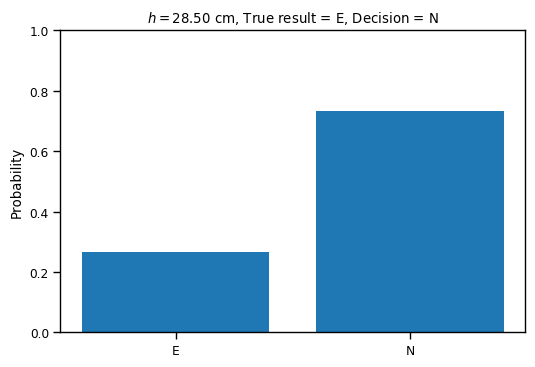

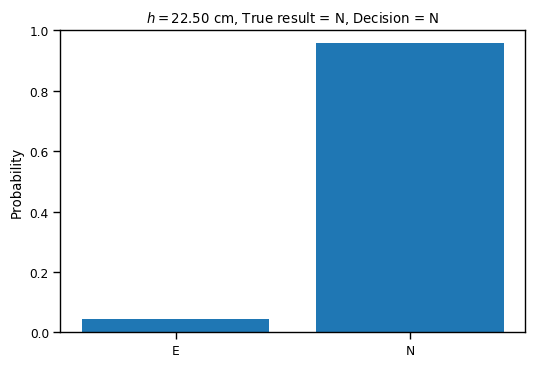

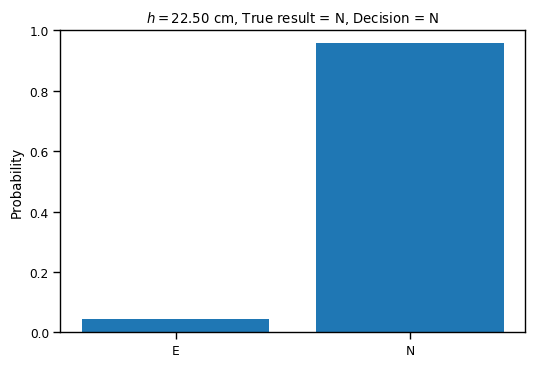

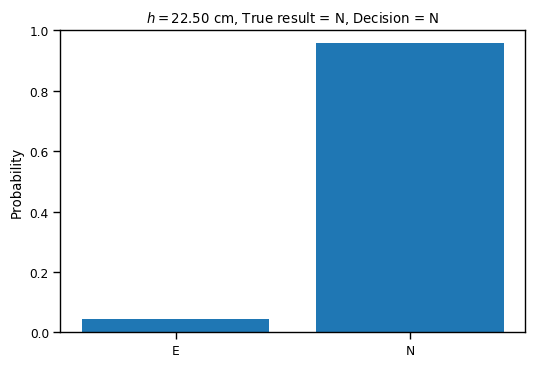

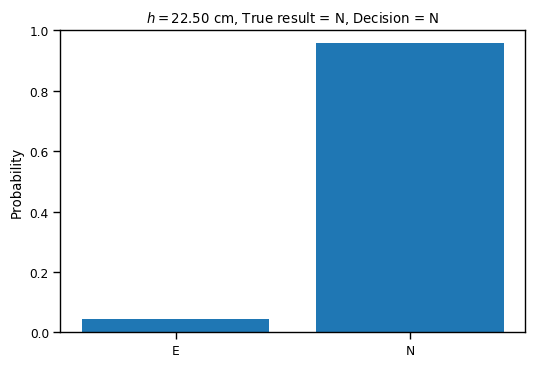

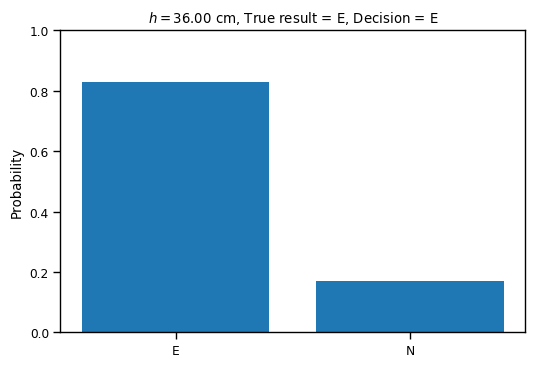

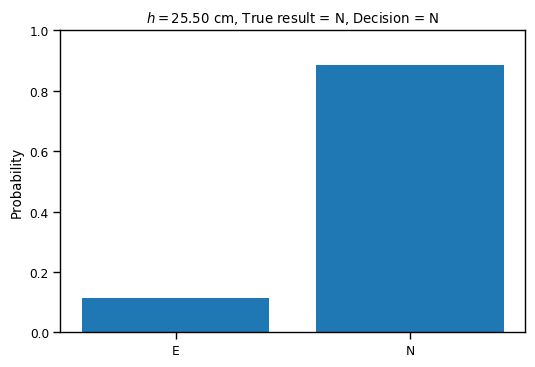

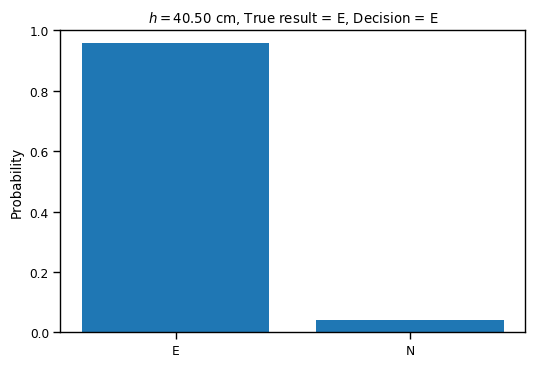

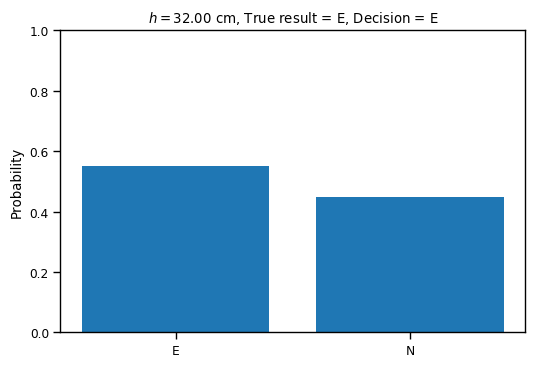

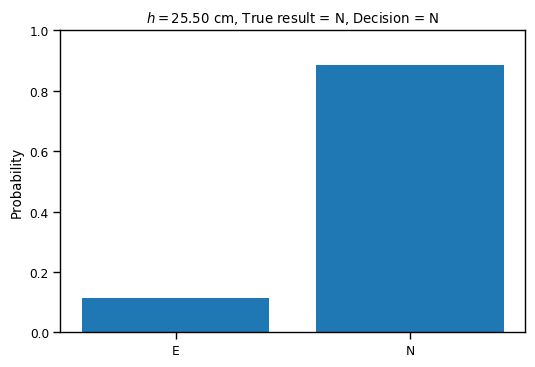

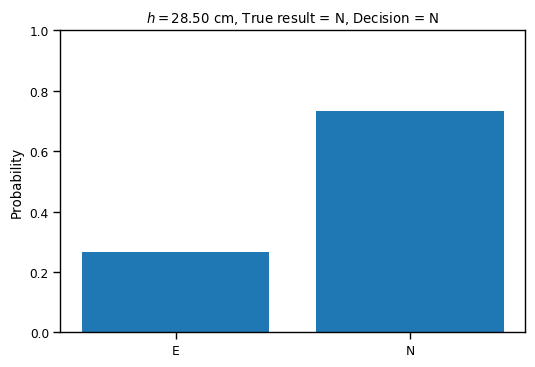

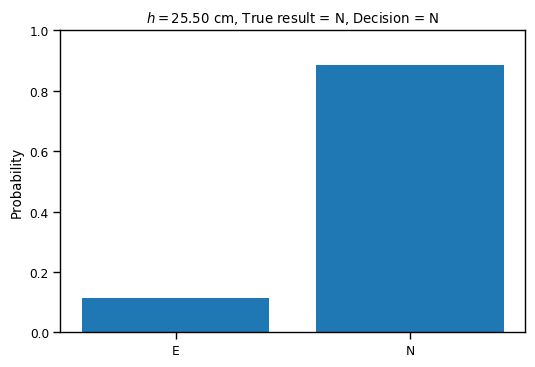

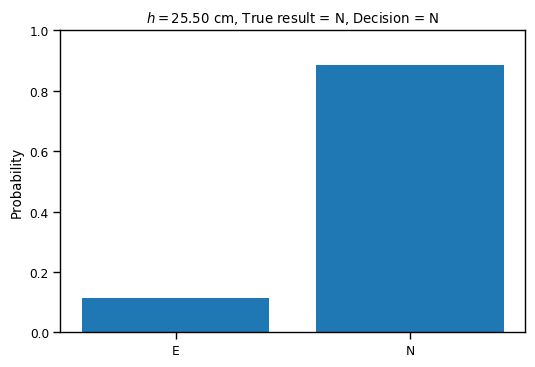

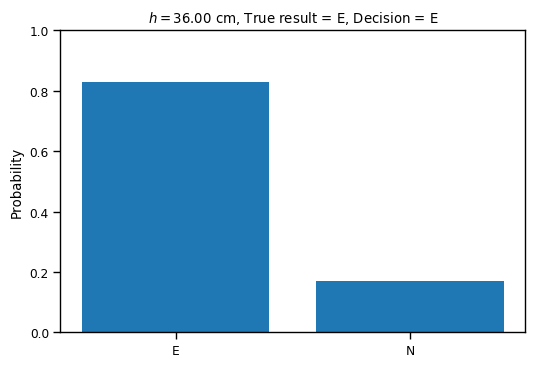

In [90]:
for i in range(X_valid.shape[0]):
    # Make decision
    exp_cost = np.einsum('ij,j->i', cost_matrix, predictions[i])
    decision = model.classes_[np.argmin(exp_cost)]
    fig, ax = plt.subplots(dpi=100)
    ax.bar(np.arange(2), predictions[i])
    ax.set_title(r'$h={0:1.2f}$ cm, True result = {1:s}, Decision = {2:s}'.format(x_valid[i], y_valid[i], decision))
    ax.set_ylim([0, 1.0])
    ax.set_xticks([0, 1])
    ax.set_xticklabels(model.classes_)
    ax.set_ylabel('Probability')

Text(0.5, 0, 'Predictive probability of E')

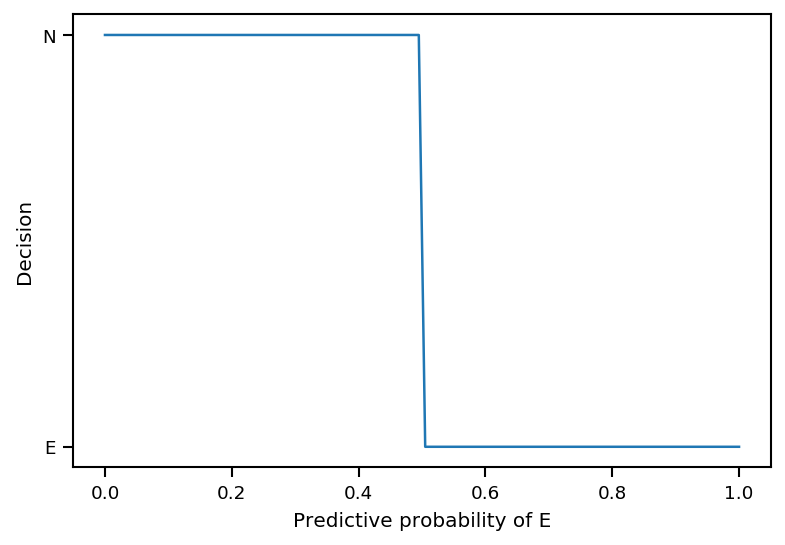

In [95]:
# Plot of decision boundary
fig, ax = plt.subplots(dpi=150)
pE = np.linspace(0, 1, 100)
pN = 1.0 - pE
probs = np.hstack([pE[:, None], pN[:, None]])
exp_cost = np.einsum('ij,kj->ki', cost_matrix, probs)
decision_idx = np.argmin(exp_cost, axis=1)
ax.plot(pE, decision_idx)
ax.set_yticks([0, 1])
ax.set_yticklabels(['E', 'N'])
ax.set_ylabel('Decision')
ax.set_xlabel('Predictive probability of E')

Text(0.5, 0, 'Predictive probability of E')

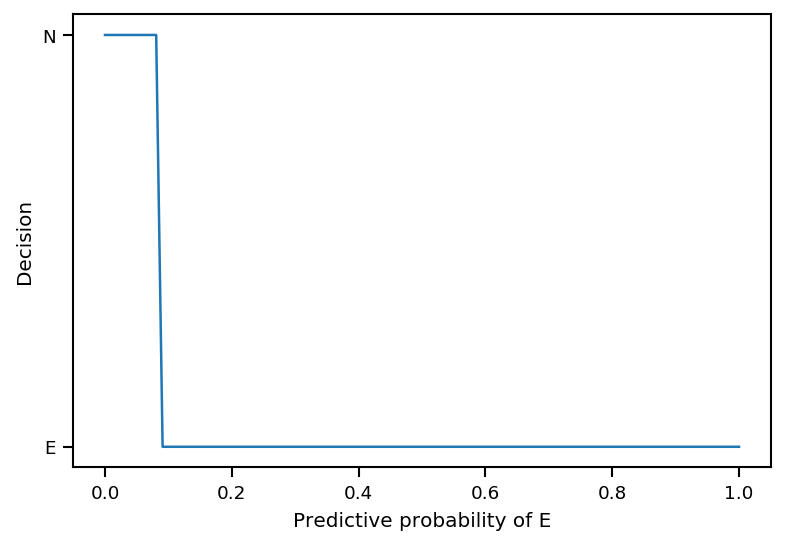

In [96]:
cost_matrix = np.array(
[[0.0, 1.0],
 [10.0, 0.0]]
)
# Plot of decision boundary
fig, ax = plt.subplots(dpi=150)
pE = np.linspace(0, 1, 100)
pN = 1.0 - pE
probs = np.hstack([pE[:, None], pN[:, None]])
exp_cost = np.einsum('ij,kj->ki', cost_matrix, probs)
decision_idx = np.argmin(exp_cost, axis=1)
ax.plot(pE, decision_idx)
ax.set_yticks([0, 1])
ax.set_yticklabels(['E', 'N'])
ax.set_ylabel('Decision')
ax.set_xlabel('Predictive probability of E')

In [97]:
from sklearn.metrics import accuracy_score

In [102]:
y_pred = model.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print('HMX Accuracy = {0:1.2f} %'.format(acc * 100))

HMX Accuracy = 94.44 %


In [103]:
from sklearn.metrics import balanced_accuracy_score

In [104]:
bacc = balanced_accuracy_score(y_valid, y_pred)
print('HMX balanced accuracy = {0:1.2f} %'.format(bacc * 100))

HMX balanced accuracy = 94.44 %


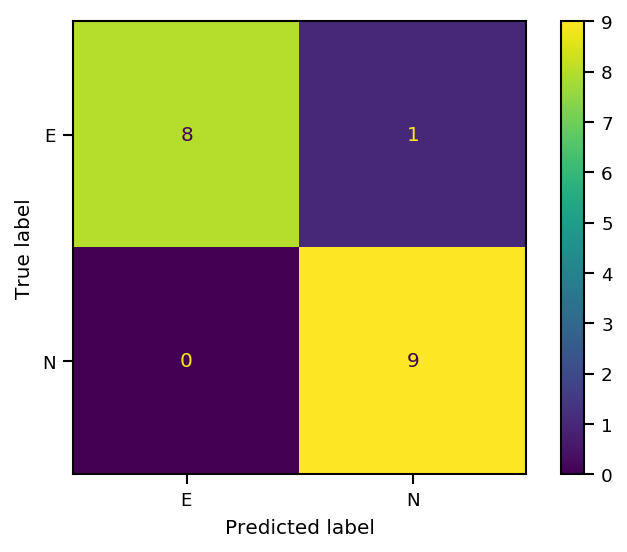

In [108]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
fig, ax = plt.subplots(dpi=150)
plot_confusion_matrix(model, X_valid, y_valid, ax=ax)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_valid, scores, pos_label=2)

In [ ]:
>>> from sklearn.metrics import roc_curve
>>> y = np.array([1, 1, 2, 2])
>>> scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)
>>> fpr
array([0. , 0. , 0.5, 0.5, 1. ])
>>> tpr
array([0. , 0.5, 0.5, 1. , 1. ])
>>> thresholds
array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ])